In [1]:
import sklearn

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist=fetch_openml('mnist_784' , version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist['data'],mnist['target']

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
y


array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

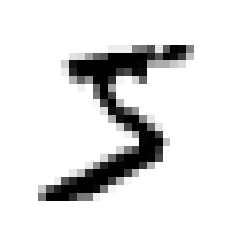

5


In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()
print(y[0])

In [10]:
y.dtype

dtype('O')

In [11]:
import numpy as np

In [12]:
y = y.astype(np.uint8)

In [13]:
print(np.array(y))

[5 0 4 ... 4 5 6]


In [14]:
X_train , X_test , y_train , y_test = X[:60000],X[60000:],y[:60000],y[60000:]

# try to identify one digit—for example,the number 5.  This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for this classification task:

In [15]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test ==5)

# Stochastic Gradient Descent (SGD) classifier

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([some_digit])

array([ True])

# Occasionally you will need more control over the cross-validation process than what Scikit-Learn provides off the shelf. In these cases, you can implement cross-validation yourself. The following code does roughly the same thing as Scikit-Learn’s cross_val_score() function, and it prints the same result:

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
 clone_clf = clone(sgd_clf)
 X_train_folds = X_train[train_index]
 y_train_folds = y_train_5[train_index]
 X_test_fold = X_train[test_index]
 y_test_fold = y_train_5[test_index]
 clone_clf.fit(X_train_folds, y_train_folds)
 y_pred = clone_clf.predict(X_test_fold)
 n_correct = sum(y_pred == y_test_fold)
 print(n_correct / len(y_pred))

C:\Users\mithilesh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.95035
0.96035
0.9604


In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(sgd_clf , X_train , y_train_5 , cv=3 , scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [22]:
from sklearn.base import BaseEstimator
class Neverclassifier5(BaseEstimator):
    def fit(self , X , y=None):
        return(self)
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [23]:
never_5_clf = Neverclassifier5()

In [24]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

# confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
con_mat = confusion_matrix(y_train_5,y_train_pred)

In [29]:
con_mat


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

# A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal

In [30]:
y_train_perfect_predictions = y_train_5 
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

# Precision and Recall

In [31]:
from sklearn.metrics import precision_score , recall_score
precision_score(y_train_5, y_train_pred) 

0.8370879772350012

In [32]:
recall_score(y_train_5, y_train_pred) 

0.6511713705958311

In [33]:
from sklearn.metrics import f1_score

In [34]:
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [35]:
#board infitinity

In [36]:
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [37]:
threshold=0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [38]:
for i in range(9):
    threshold=i
    y_some_digit_pred = (y_score > threshold)
    print(y_some_digit_pred)

[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]


In [39]:
threshold=8000
y_some_digit_pred = (y_score > threshold)
print(y_some_digit_pred)

[False]


In [40]:
y_score = cross_val_predict(sgd_clf , X_train , y_train_5 ,
                            cv=3 ,method='decision_function')

In [41]:
y_score

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [42]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_score)


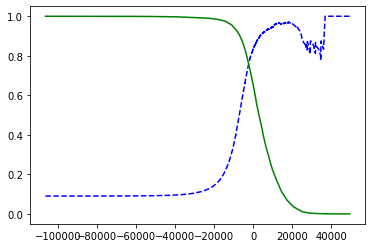

In [43]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [44]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 

In [45]:
y_train_pred_90 = (y_score >= threshold_90_precision)

In [46]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [47]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [48]:
from sklearn.metrics import roc_curve
fpr , tpr , thresholds = roc_curve(y_train_5,y_score)


# plot the FPR against the TPR using Matplotlib

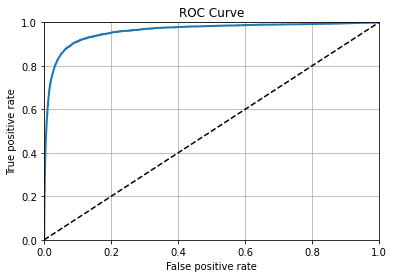

In [49]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.grid(True)
 plt.xlabel('False positive rate')
 plt.ylabel('True positive rate')
 plt.plot([0, 1], [0, 1], 'k--')
 plt.xlim(0,1)
 plt.ylim(0,1)
 plt.title('ROC Curve')
plot_roc_curve(fpr, tpr)
plt.show()

# compute roc Scores

In [50]:
from sklearn.metrics import roc_auc_score

In [51]:
roc_auc_score(y_train_5, y_score)

0.9604938554008616

# Now train a RandomForestClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
forest_clf =RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5 , cv=3,
                                    method="predict_proba")

#  Let’s use the positive class’s probability as the score:

In [53]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

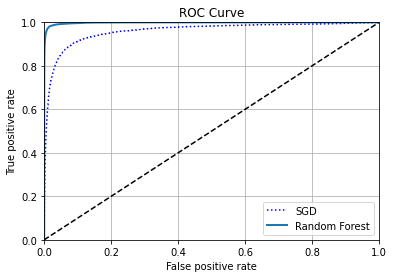

In [54]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

#  roc_auc_score

In [55]:
print('roc_auc_score : ' , roc_auc_score(y_train_5,y_scores_forest))

roc_auc_score :  0.9983436731328145


# Multiclass Classification

# Support Vector Machine classifier

In [56]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

# some_digit_scores

In [57]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [58]:
import numpy as np
np.argmax(some_digit_scores)
svm_clf.classes_
svm_clf.classes_[5]

5

In [59]:
from sklearn.multiclass import OneVsRestClassifier

In [60]:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [61]:
ovr_clf.predict([some_digit])
print(len(ovr_clf.estimators_))

10


In [62]:
sgd_clf.decision_function([some_digit])


array([2164.22030239])

In [63]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Error checking 

In [65]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)


[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


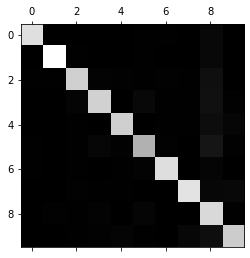

In [66]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [67]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

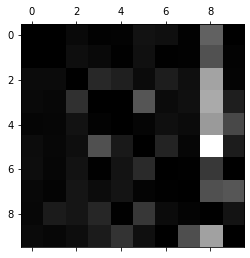

In [68]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [71]:
#extra 
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

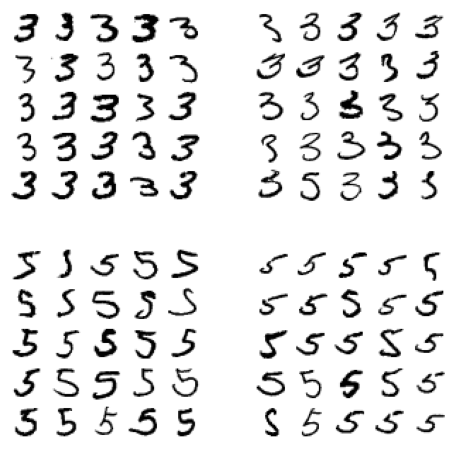

In [72]:
#extra
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


# multilabel classification system

In [70]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [73]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [74]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [75]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [78]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [81]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [84]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

Saving figure noisy_digit_example_plot


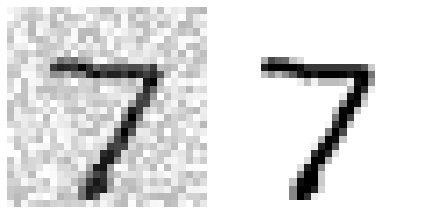

In [85]:
import os
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

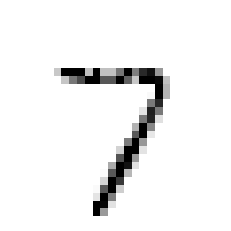

In [80]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)